<a href="https://colab.research.google.com/github/mequanent/Deep-Learning/blob/main/2_NNs_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Clone the repository first using the following command 
!npx degit https://github.com/mequanent/Deep-Learning -f

npx: installed 1 in 2.747s
> destination directory is not empty. Using --force, continuing
> cloned mequanent/Deep-Learning#HEAD


# Libraries

In [5]:
import numpy as np
import pandas as pd
import random
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.datasets import mnist
#from keras import layers
from keras.models import Sequential
#from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D#, Conv2DTranspose
#from keras.optimizers import Adam
from keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

# 1.	
(20%) Please construct a neural net (with its architecture shown below) and train it on ‘train.mat.” The activation function must be used in the two hidden layers and the output layer. You can construct and optimize your network model by using any off-the-shelf functions. Report the test error on the test set ‘test.mat’ (percentage of misclassified test samples). 

# Read Dataset 

In [8]:
train = loadmat(r"NNs from Scratch/train.mat") 
test = loadmat(r"NNs from Scratch/test.mat") 
df = pd.DataFrame()
df['x1'] = train['x1'].flatten()
df['x2'] = train['x2'].flatten()
df['y'] = train['y']

test_df = pd.DataFrame()
test_df['x1'] = test['x1'].flatten()
test_df['x2'] = test['x2'].flatten()
test_df['y'] = test['y']

In [9]:
model = keras.Sequential()
model.add(Dense(3, input_shape=(2,), activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(2, activation='relu', use_bias=True, bias_initializer='ones'))
model.add(Dense(1, activation='sigmoid', use_bias=True, bias_initializer='zeros'))

model.compile(optimizer='adam', 
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

x = np.column_stack((df.x1.values, df.x2.values))
x_test = np.column_stack((test_df.x1.values, test_df.x2.values))

model.fit(x, df.y.values, batch_size=10, epochs=400)

Epoch 1/500
7/7 [==============================] - 1s 5ms/step - loss: 0.7160 - accuracy: 0.5000
Epoch 2/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7107 - accuracy: 0.5000
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7071 - accuracy: 0.5000
Epoch 4/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7037 - accuracy: 0.5000
Epoch 5/500
7/7 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.5000
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5000
Epoch 7/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5000
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5000
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5000
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5000
Epoch 11/500
7/7 [===========

In [10]:
evaluation = model.evaluate(x_test, test_df.y.values)
error_rate = 1 - evaluation[1]
print("Prediction error rate on test data: ", error_rate)

1/1 [==============================] - 0s 236ms/step - loss: 0.1693 - accuracy: 0.9333
Prediction error rate on test data:  0.06666666269302368


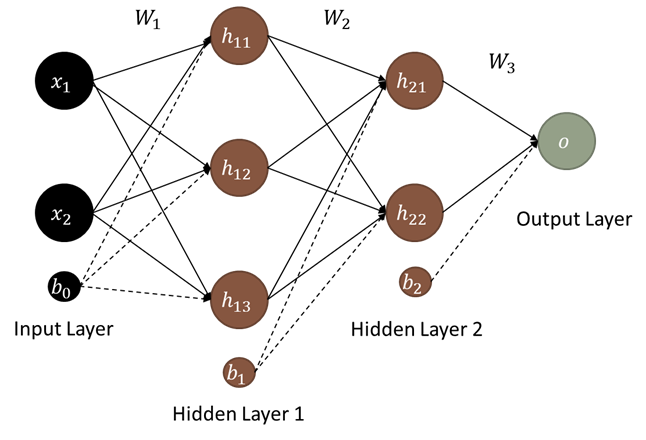

# 2

## 2.1	
(20%) You are asked to construct a classification model based on multi-layer convolutional neural networks (at least five layers) for digit recognition. Please report the prediction accuracy for the test set. (Hint: its loss function could be cross entropy)

In [11]:
def preprocess():
  # load dataset
  (trainX, trainy), (testX, testy) = mnist.load_data()
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  trainX = trainX.astype('float') / 255
  testX = testX.astype('float') / 255

  trainy = to_categorical(trainy)
  testy = to_categorical(testy)
  return trainX, testX, trainy, testy

xtrain, xtest, ytrain, ytest = preprocess()

11490434/11490434 [==============================] - 1s 0us/step


In [14]:
def build_model(input_shape): 
  model = keras.Sequential() 
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  #model.add(Dropout(0.2))
  model.add(Flatten()) 
  model.add(Dense(128, activation='relu')) 
  model.add(Dense(64, activation='relu')) 
  model.add(Dense(10, activation='softmax')) 

  return model
  
input_shape = xtrain.shape[1:]
model_2_1 = build_model(input_shape)
model_2_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 20, 20, 64)        73792     
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 18, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 32)         0         
 2D)                                                             
                                                      

In [15]:
model_2_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model_2_1.fit(xtrain, ytrain, batch_size=128, epochs=10, validation_split=0.1) 

Epoch 1/10
422/422 [==============================] - 770s 2s/step - loss: 0.1750 - accuracy: 0.9465 - val_loss: 0.0529 - val_accuracy: 0.9845
Epoch 2/10
422/422 [==============================] - 720s 2s/step - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0470 - val_accuracy: 0.9860
Epoch 3/10
422/422 [==============================] - 716s 2s/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0319 - val_accuracy: 0.9913
Epoch 4/10
422/422 [==============================] - 725s 2s/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0375 - val_accuracy: 0.9898
Epoch 5/10
422/422 [==============================] - 715s 2s/step - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0366 - val_accuracy: 0.9908
Epoch 6/10
422/422 [==============================] - 722s 2s/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0422 - val_accuracy: 0.9907
Epoch 7/10
422/422 [==============================] - 714s 2s/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0335 - val_accuracy: 0.9908

In [100]:
evaluation = model.evaluate(xtest, ytest, verbose=0)
print("Test loss: ", evaluation[0])
print("Test accuracy: ", evaluation[1])
#print("Prediction error: ", 1 - evaluation[1])

Test loss:  0.04449477791786194
Test accuracy:  0.9896000027656555


## 2.2	
(15%) Please randomly set 5%, 10%, and 15% of pixels to 255 for each image and evaluate the test set using the model you trained on clean images from 2.1. Report the prediction accuracies for the three different corruption rates. Compare your results with those in Question 2.1. What do you find?

In [6]:
def corrupt(data, corrupt_lv):
  #corrupt_lv = 0.05    #% using 5% and training data as an example 
  img_size = 28*28
  corrupted = []
  for i in range(len(data)):
    ran_seq = random.sample([n for n in range(img_size)], int(img_size*corrupt_lv))
    x = data[i].reshape(-1, img_size) 
    x[0, ran_seq] = 1 # 1 because already normalized by 255 
    x = x.reshape((28, 28, 1)) 
    corrupted.append(x) 
  return np.array(corrupted) 

In [7]:
xtest_corrupted_5 = corrupt(xtest.copy(), 0.05) 
xtest_corrupted_10 = corrupt(xtest.copy(), 0.1) 
xtest_corrupted_15 = corrupt(xtest.copy(), 0.15) 

In [78]:
np.sum(xtest_corrupted_5 != xtest), np.sum(xtest_corrupted_10 != xtest), np.sum(xtest_corrupted_15 != xtest)

(387183, 774224, 1161433)

In [9]:
score_5 = model_2_1.evaluate(xtest_corrupted_5, ytest, verbose=0)
score_10 = model_2_1.evaluate(xtest_corrupted_10, ytest, verbose=0)
score_15 = model_2_1.evaluate(xtest_corrupted_15, ytest, verbose=0)

In [12]:
print("Accuracy with NO noise: ", evaluation[1])
print("Accuracy with 5% noise: ", score_5[1])
print("Accuracy with 10% noise: ", score_10[1])
print("Accuracy with 15% noise: ", score_15[1])

Accuracy with NO noise:  0.9902999997138977
Accuracy with 5% noise:  0.8992000222206116
Accuracy with 10% noise:  0.7980999946594238
Accuracy with 15% noise:  0.6891999840736389


The accuracy before introducing any noise to the dataset is better than all others.
The prediction accuracy of the model trained with noise free dataset lowers down as the percentage of the noise introduced to the testing dataset increases. 

## 2.3	
(15%) Following Question 2.2, please re-train your model with the corrupted data (5%, 10%, and 15% separately) and re-evaluate the test set.
Report the prediction accuracies also for the three different corruption rates. Compare your results with those from 2.1 and 2.2. What do you find?


In [13]:
# get corrupted training data 
xtrain_corrupted_5 = corrupt(xtrain.copy(), 0.05) 
xtrain_corrupted_10 = corrupt(xtrain.copy(), 0.1) 
xtrain_corrupted_15 = corrupt(xtrain.copy(), 0.15) 

In [14]:
# build and test model based on the corrupted training and testing 
def get_corrupted_model(x_train, y_train, x_test, y_test):  
  batch_size = 128 
  epochs = 10 
  input_shape = x_train.shape[1:] 
  model = build_model(input_shape) 
  #model.summary() 

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1) 

  evaluation = model.evaluate(x_test, y_test, verbose=0)
  #print("Test loss: ", evaluation[0])
  #print("Test accuracy: ", evaluation[1])
  return evaluation[1] # return accuracy of the model

In [15]:
acc_5 = get_corrupted_model(xtrain_corrupted_5, ytrain, xtest_corrupted_5, ytest, verbose=0)
acc_10 = get_corrupted_model(xtrain_corrupted_10, ytrain, xtest_corrupted_10, ytest, verbose=0)
acc_15 = get_corrupted_model(xtrain_corrupted_15, ytrain, xtest_corrupted_15, ytest, verbose=0)

Epoch 1/10
422/422 [==============================] - 11s 25ms/step - loss: 0.1952 - accuracy: 0.9385 - val_loss: 0.0566 - val_accuracy: 0.9845
Epoch 2/10
422/422 [==============================] - 10s 24ms/step - loss: 0.0556 - accuracy: 0.9826 - val_loss: 0.0544 - val_accuracy: 0.9827
Epoch 3/10
422/422 [==============================] - 10s 24ms/step - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0450 - val_accuracy: 0.9867
Epoch 4/10
422/422 [==============================] - 10s 24ms/step - loss: 0.0288 - accuracy: 0.9904 - val_loss: 0.0465 - val_accuracy: 0.9877
Epoch 5/10
422/422 [==============================] - 10s 24ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0371 - val_accuracy: 0.9897
Epoch 6/10
422/422 [==============================] - 9s 22ms/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0376 - val_accuracy: 0.9912
Epoch 7/10
422/422 [==============================] - 10s 23ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0467 - val_accuracy: 

In [16]:
print("Accuracy of the model trained with 5% corrupted data: ", acc_5)
print("Accuracy of the model trained with 5% corrupted data: ", acc_10)
print("Accuracy of the model trained with 5% corrupted data: ", acc_15)

Accuracy of the model trained with 5% corrupted data:  0.989799976348877
Accuracy of the model trained with 5% corrupted data:  0.9873999953269958
Accuracy of the model trained with 5% corrupted data:  0.9883000254631042


## 2.4	
(15%) Following Question 2.2, please construct ONE restoration model (also convolutional neural networks) that inputs a corrupt image and outputs its restored image. (Hint: its loss function could be MAE or MSE)

In [ ]:
def display_images(image1, image2):
  plt.figure(figsize=(40, 4))
  for i in range(10):
      # display original
      ax = plt.subplot(3, 20, i + 1)
      plt.imshow(image1[i].reshape(28, 28), cmap="binary")
      
      # display reconstructed (after noise removed) image
      ax = plt.subplot(3, 20, 40 +i+ 1)
      plt.imshow(image2[i].reshape(28, 28), cmap="binary")

  plt.show()

In [ ]:
def restore_images(xtrain, xtrain_corrupted):
  model = Sequential()
  # DownSample (Encode)
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))

  # UpSample (Decode)
  model.add(UpSampling2D((2, 2)))
  model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
  model.add(UpSampling2D((2, 2))) 
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
  model.add(UpSampling2D((2, 2))) 
  model.add(Conv2D(1, (3, 3), activation='relu', padding='same')) 

  model.compile(optimizer='adam', loss='mean_squared_error') 

  model.fit(xtrain_corrupted, xtrain, epochs=10, batch_size=256, 
            shuffle=True, validation_split=0.1) 

  #model.evaluate(xtest_corrupted, xtest) 

  #model.save('restoring_model.model')
  return model

In [ ]:
restoring_model = restore_images(xtrain, xtrain_corrupted_5, xtest, xtest_corrupted_5)
restored_5 = restoring_model.predict(xtest_corrupted_5)
display_images(xtest_corrupted_5, restored_5)

In [ ]:
restored_10 = restoring_model.predict(xtest_corrupted_10)
display_images(xtest_corrupted_10, restored_10)

In [ ]:
restored_15 = restoring_model.predict(xtest_corrupted_15)
display_images(xtest_corrupted_15, restored_15)

In [88]:
autoencoder = restore_images(xtrain, xtrain_corrupted_5, xtest, xtest_corrupted_5) 
predictions_5 = autoencoder.predict(xtest_corrupted_5) 

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.0133 - accuracy: 0.8138 - val_loss: 0.0050 - val_accuracy: 0.8141
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0045 - accuracy: 0.8151 - val_loss: 0.0039 - val_accuracy: 0.8142
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0038 - accuracy: 0.8152 - val_loss: 0.0034 - val_accuracy: 0.8143
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0034 - accuracy: 0.8153 - val_loss: 0.0031 - val_accuracy: 0.8143
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0031 - accuracy: 0.8153 - val_loss: 0.0029 - val_accuracy: 0.8143
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0029 - accuracy: 0.8153 - val_loss: 0.0028 - val_accuracy: 0.8143
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0027 - accuracy: 0.8153 - val_loss: 0.0026 - val_accuracy: 0.8143


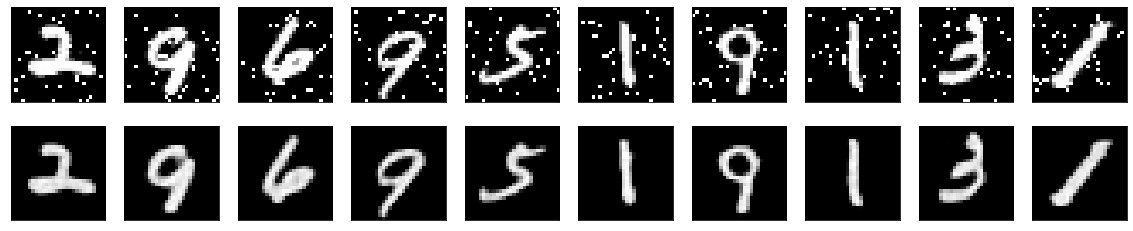

In [89]:
display(xtest_corrupted_5, predictions_5) 

313/313 [==============================] - 1s 2ms/step


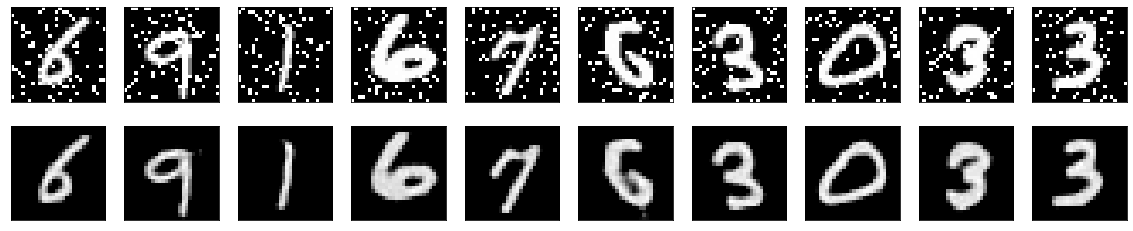

In [90]:
predictions_10 = autoencoder.predict(xtest_corrupted_10)
display(xtest_corrupted_10, predictions_10) 

313/313 [==============================] - 1s 2ms/step


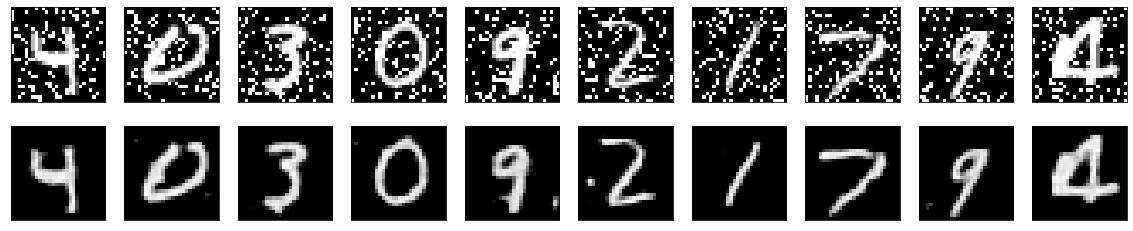

In [91]:
predictions_15 = autoencoder.predict(xtest_corrupted_15)
display(xtest_corrupted_15, predictions_15) 

In [87]:
def restore_images(xtrain, xtrain_corrupted, xtest, xtest_corrupted):
  input = layers.Input(shape=(28, 28, 1))

  # Encoder
  x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
  x = MaxPooling2D((2, 2), padding="same")(x)
  x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
  x = MaxPooling2D((2, 2), padding="same")(x)

  # Decoder
  x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
  x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
  x = Conv2D(1, (3, 3), activation="relu", padding="same")(x)

  # Autoencoder
  autoencoder = Model(input, x)
  autoencoder.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

  autoencoder.fit(x=xtrain_corrupted, y=xtrain, epochs=10, batch_size=128, 
                  shuffle=True, validation_data=(xtest_corrupted, xtest))

  return autoencoder

In [27]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

## 2.5	
(15%) Following Question 2.4, please evaluate the restored test set using the model you trained on clean images in Question 2.1. Report the prediction accuracies for restored images separately at the three different corruption rates. What do you find?

In [101]:
evaluation = model.evaluate(predictions_15, ytest, verbose=0) 
print("Test loss: ", evaluation[0]) 
print("Test accuracy: ", evaluation[1]) 

Test loss:  0.08224095404148102
Test accuracy:  0.9835000038146973


In [102]:
evaluation = model.evaluate(xtest_corrupted_15, ytest, verbose=0) 
print("Test loss: ", evaluation[0]) 
print("Test accuracy: ", evaluation[1]) 

Test loss:  0.3818049430847168
Test accuracy:  0.8956000208854675


In [ ]:
def build_model(input_shape): 
  model = keras.Sequential() 
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2)) 
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2)) 
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2)) 
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2)) 
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu')) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2)) 
  model.add(Flatten()) 
  model.add(Dense(128, activation='relu')) 
  model.add(Dense(64, activation='relu')) 
  model.add(Dense(10, activation='softmax')) 

  return model
  
input_shape = xtrain.shape[1:]
model = build_model(input_shape)
model.summary()

ValueError: ignored

In [ ]:
def build_nn_model(input_shape):
  # create model
  model = keras.Sequential()

  # 2 LSTM layers
  model.add(layers.LSTM(64, input_shape=input_shape, return_sequences=True))
  model.add(layers.LSTM(64))
  
  # dense layer
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(0.3))

  # output layer
  model.add(layers.Dense(10, activation='softmax'))

  return model

In [ ]:
import numpy as np
from random import random

# save the activations and derivatives for gd
# implement backpropagation
# implement gradient descent
# implement a train method
# train our net with some dummy dataset
# make some predictions

class MLP:
  # Constructor
  def __init__(self, num_inputs = 3, num_hidden = [3, 3], num_outputs = 2):
    self.num_inputs = num_inputs
    self.num_hidden = num_hidden
    self.num_outputs = num_outputs

    layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]

    # Initialize random weights
    weights = []
    for i in range(len(layers) - 1):
      w = np.random.rand(layers[i], layers[i + 1])
      weights.append(w)
    self.weights = weights

    activations = []
    for i in range(len(layers)):
      a = np.zeros(layers[i])
      activations.append(a)
    self.activations = activations
  
    derivatives = []
    for i in range(len(layers)-1):
      d = np.zeros((layers[i], layers[i + 1]))
      derivatives.append(d)
    self.derivatives = derivatives

  def forward_propagate(self, inputs):
    activations = inputs

    self.activations[0] = inputs

    for i, w in enumerate(self.weights):
      # calculate net inputs
      net_inputs = np.dot(activations, w)

      # calculate activations
      activations = self._sigmoid(net_inputs)
      self.activations[i + 1] = activations

    return activations

  def back_propagate(self, error, verbose = False):
    # dE/dW_i = (y - a_[i+1]) s'(h_[i+1]) a_i
    # s'(h_[i+1]) = s(h_[i+1])(1 - s(h_[i+1]))
    # s(h_[i+1]) = a_[i+1]

    # dE/dW_[i-1] = (y - a_[i+1]) s'(h_[i+1]) W_i s'(h_i) a_[i-1]

    for i in reversed(range(len(self.derivatives))):
      activations = self.activations[i+1]
      delta = error * self._sigmoid_derivative(activations) # ndarray([0.1, 0.2]) --> ndarray([[0.1, 0.2]])
      delta_reshaped = delta.reshape(delta.shape[0], -1).T
      current_activations = self.activations[i] # ndarray([0.1, 0.2]) --> ndarray([[0.1], [0.2]])
      
      current_activations = current_activations.reshape(current_activations.shape[0], -1)
      
      self.derivatives[i] = np.dot(current_activations, delta_reshaped)
      error = np.dot(delta, self.weights[i].T)

      if verbose:
        print(f"Derivatives for W{i}: {self.derivatives[i]}")      

    return error

  def gradient_descent(self, learning_rate):
    for i in range(len(self.weights)):
      weights = self.weights[i]
      #print(f"Original W{i} {weights} ")

      derivatives = self.derivatives[i]

      weights +=  derivatives * learning_rate
      #print(f"Updated W{i} {weights} ")
  
  def train(self, inputs, targets, epochs, learning_rate):
    for i in range(epochs):
      sum_error = 0
      for input, target  in zip(inputs, targets):
        
        # Perform forward Propagation
        output = self.forward_propagate(input)
        # calculate the error
        error = target - output
        # backward propagation
        self.back_propagate(error)##, verbose = True)
        # Apply grdient descent 
        self.gradient_descent(learning_rate)

        sum_error += self._mse(target, output)
      # report the error for each epoch
      print(f"Error: {sum_error / len(inputs)} at epoch {i}")

    

  def _mse(self, target, output):
    return np.average((target- output) ** 2)

  def _sigmoid_derivative(self, x):
    return x * (1.0 - x)

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

if __name__ == "__main__":
  # Create dummy inputs --> arry([[0.1, 0.2], [0.3, 0.4]])
  inputs = np.array([[random()/2 for _ in range(2)] for _ in range(1000)])
  
  targets = np.array([[i[0] + i[1]] for i in inputs]) # array([[0.3], [0.7]])

  # Create MLP
  mlp = MLP(2, [5], 1)
  
  print(inputs)
  print(inputs.shape)
  # train our mlp
  mlp.train(inputs, targets, 50, 0.1)

  # Create dummy data
  input = np.array([0.3, 0.1])
  target = np.array([0.4])
  output = mlp.forward_propagate(input)
  print(f"\n\n Our network believes that {input[0]} + {input[1]} is equal to {output[0]}")


In [ ]:
# read the data, build the NN, compile, train and test 
if __name__ == "__main__":
  # load data
  inputs, targets = load_data(DATASET_PATH)

  # split the data into train and test sets
  inputs_train, inputs_test, targets_train, targets_test = train_test_split(
      inputs, targets, test_size=0.3
  )
  # build the network architecture
  model = keras.Sequential([
    # input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),
    #  1st hidden layer
    keras.layers.Dense(512, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #  2nd hidden layer
    keras.layers.Dense(256, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    #  3rd hidden layer
    keras.layers.Dense(64, activation = "relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    # output layer
    keras.layers.Dense(10, activation = "softmax")
  ])

  # compile network
  optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
  model.compile (optimizer = optimizer,
                 loss = "sparse_categorical_crossentropy",
                 metrics = "accuracy")
  model.summary()

  # train network
  history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test),
            epochs = 50, batch_size = 32)
  # plot accuracy and error over the epochs
  plot_history(history)